In [106]:
import numpy as np
import matplotlib.pyplot as plt
print_figs = True


plt.rcParams.update({
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "lines.linewidth": 3,
})

rng = np.random.default_rng(25)


### Sampling from a hierarchical GMM

In [107]:
# Dimensions / sizes
N = 400      # number of observations
K = 4        # number of clusters
d = 2        # data dimension (2D so we can plot)

# Priors
alpha = np.ones(K) * 10.0          # Dirichlet prior on mixture weights
m0 = np.zeros(d)                  # prior mean for cluster means
Sigma0 = np.eye(d) * 5.0          # prior covariance for cluster means

# Likelihood covariance (within-cluster noise)
Sigma = np.eye(d) * 0.4


In [108]:
# Global latents

# Mixture weights
pi = rng.dirichlet(alpha)   # shape (K,)

# Cluster means
mus = rng.multivariate_normal(mean=m0, cov=Sigma0, size=K)  # shape (K, d)

pi, mus


(array([0.25781727, 0.19333844, 0.23194525, 0.31689904]),
 array([[ 4.98500906,  4.34622738],
        [-0.51032918, -0.34699556],
        [ 2.14431094, -0.56967287],
        [ 0.50259216,  2.72769037]]))

In [109]:
# Local latents

# Cluster assignments
z = rng.choice(K, size=N, p=pi)     # shape (N,)

# Observations
x = np.empty((N, d))
for n in range(N):
    x[n] = rng.multivariate_normal(mean=mus[z[n]], cov=Sigma)



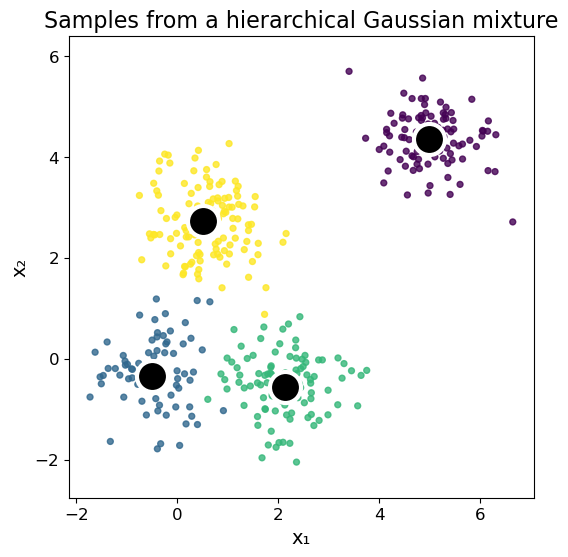

In [110]:
#plot

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=z, s=18, alpha=0.8)

plt.scatter(
    mus[:, 0], mus[:, 1],
    s=500,
    marker="o",
    c="black",
    edgecolors="white",
    linewidths=3,
    zorder=10
)

plt.title(
    "Samples from a hierarchical Gaussian mixture",
    fontsize=16
)
plt.xlabel("x₁", fontsize=14)
plt.ylabel("x₂", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axis("equal")

if print_figs:
    plt.savefig("../img/week3_hierarchical_GMM.pdf", format="pdf", bbox_inches="tight")

### Bayesian linear regression

In [111]:
# Setup, define the model and sample latents

# Problem size
N = 80          # number of data points
d = 1           # keep d=1 for an easy plot; change to >1 if you like

# Prior on weights: w ~ N(m0, Sigma0)
m0 = np.zeros(d)
Sigma0 = np.eye(d) * 1.0

# Observation noise
sigma = 0.3     # std dev

# Sample latent weights
w = rng.multivariate_normal(m0, Sigma0)   # shape (d,)
w


array([1.69105104])

In [112]:
# Generate data

# # Input matrix X
x = rng.uniform(-2, 2, size=N)
X = x.reshape(-1, 1)   # N x d

# Generate y = Xw + noise
y = (X @ w).ravel() + rng.normal(0, sigma, size=N)


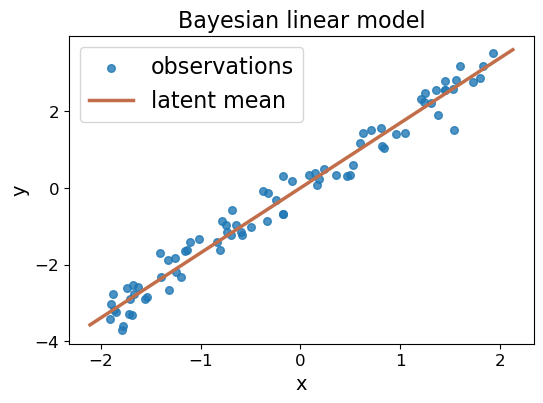

In [113]:
# Grid for plotting the true function
xg = np.linspace(x.min() - 0.2, x.max() + 0.2, 200)
Xg = xg.reshape(-1, 1)
yg_true = (Xg @ w).ravel()

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=30, alpha=0.8, label="observations")
plt.plot(
    xg, yg_true,
    linewidth=2.5,
    color="#C26E4A",
    label="latent mean"
)
plt.title("Bayesian linear model", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

if print_figs:
    plt.savefig("../img/week3_bayesian_linear_reg.pdf", format="pdf", bbox_inches="tight")


### Nonlinear state space model

In [114]:
# Define the model and choose f and h

T = 400

# Noise scales (1D for clarity)
q = 0.25   # process noise std
r = 0.45   # observation noise std

# Nonlinear transition and observation functions
def f(z):
    # mildly nonlinear and stable dynamics
    return 0.7 * z + 0.5 * np.sin(z)

def h(z):
    # nonlinear observation
    return z**2 / 5.0


In [115]:
# Simulate latent and observed trajectories

z = np.zeros(T)
y = np.zeros(T)  # noiseless output y_t = h(z_t)
x = np.zeros(T)  # observations

# Prior for z1
z[0] = rng.normal(0.0, 1.0)

for t in range(1, T):
    z[t] = f(z[t-1]) + rng.normal(0.0, q)

y = h(z)
x = y + rng.normal(0.0, r, size=T)**2


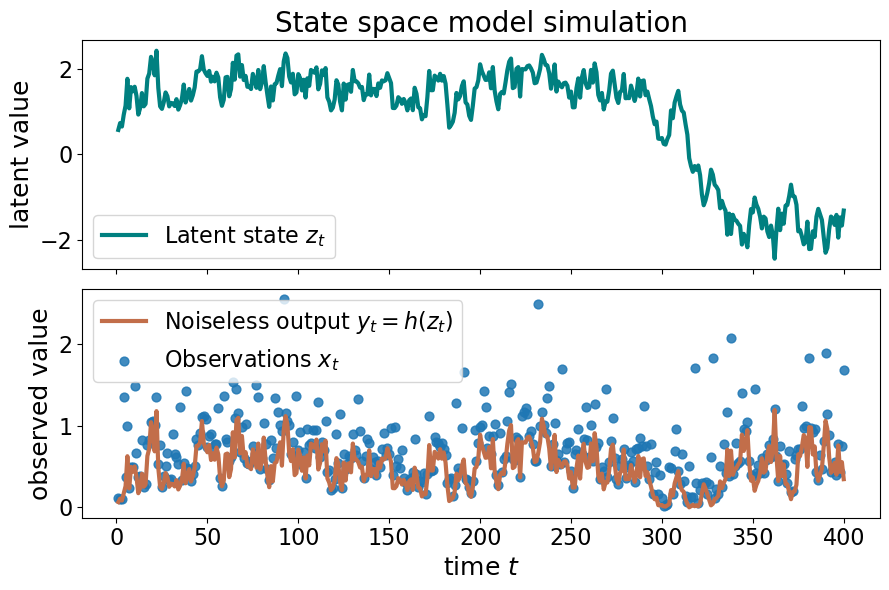

In [116]:
#plot everything

t = np.arange(1, T + 1)

fig, axes = plt.subplots(
    2, 1,
    figsize=(9, 6),
    sharex=True
)

# Top: latent trajectory
axes[0].plot(
    t, z,
    color="teal",
    label="Latent state $z_t$"
)
axes[0].set_ylabel("latent value")
axes[0].set_title("State space model simulation")
axes[0].legend()
axes[0].tick_params(axis="both")

# Bottom: noiseless output and observations
axes[1].plot(
    t, y,
    color="#C26E4A",
    label="Noiseless output $y_t = h(z_t)$"
)
axes[1].scatter(
    t, x,
    s=40,        # slightly larger points for print
    alpha=0.85,
    label="Observations $x_t$"
)
axes[1].set_xlabel("time $t$")
axes[1].set_ylabel("observed value")
axes[1].legend()
axes[1].tick_params(axis="both")

plt.tight_layout()



if print_figs:
    plt.savefig("../img/week3_SSM.pdf", format="pdf", bbox_inches="tight")

